## Drifters and Cmems data Notebook

### Introduction
This notebook aims to estimate the initial velocities of our inertial components.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 230
  - link : https://erddap.aoml.noaa.gov/gdp/erddap/tabledap/drifter_6hour_qc.html
  - period : 01-01-2015 to 01-06-2023

- CMEMS Data:
  - Source: Copernicus Marine
  - Collection Frequency: Every 24 hours
  - Data Product:  SEALEVEL_GLO_PHY_L4_MY_008_047 and MULTIOBS_GLO_PHY_MYNRT_015_003
  - link : https://doi.org/10.48670/moi-00148 and https://doi.org/10.48670/mds-00327
  - download data : ahttps://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/download and https://data.marine.copernicus.eu/product/MULTIOBS_GLO_PHY_MYNRT_015_003/download
  - period : 01-01-2015 to 01-06-2023

### Tasks

#### 1. Interpolation 
-  Interpolation of CMEMS velocities based on the spatial and temporal grid of our drifters.

#### 2.  Estimation de u_0 and v_0
-  Using the total drifter current and the altimetric geostrophic and Ekman currents.

## Import Library

In [6]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.interpolate import interp2d

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
import matplotlib.animation
from scipy.stats import linregress
from scipy.stats import pearsonr

## Read data

In [7]:
## Tropical Atlantic
f1='./drifter_6hour_qc_705d_0ae3_3659_U1719584229456.nc';
ds_1=xr.open_dataset(f1);

f2='./ugosa.nc';
ds_2=xr.open_dataset(f2);

f3='./vgosa.nc';
ds_3=xr.open_dataset(f3);

f4='./ue.nc';
ds_4=xr.open_dataset(f4);

f5='./ve.nc';
ds_5=xr.open_dataset(f5);

## Tropical Pacific

f6='./drifter_6hour_qc_9fc5_2870_4e23_U1719840271187_p.nc';
ds_6=xr.open_dataset(f6);

f7='./ugosa_p.nc';
ds_7=xr.open_dataset(f7);

f8='./vgosa_p.nc';
ds_8=xr.open_dataset(f8);

f9='./ue_p.nc';
ds_9=xr.open_dataset(f9);

f10='./ve_p.nc';
ds_10=xr.open_dataset(f10);

## Tropical Indian

f11='./drifter_6hour_qc_1217_1030_36ba_U1719837974532_i.nc';
ds_11=xr.open_dataset(f11);

f12='./ugosa_i.nc';
ds_12=xr.open_dataset(f12);

f13='./vgosa_i.nc';
ds_13=xr.open_dataset(f13);

f14='./ue_i.nc';
ds_14=xr.open_dataset(f14);

f15='./ve_i.nc';
ds_15=xr.open_dataset(f15);

## Now let's interpolate the CMEMS data onto the grid of the drifter data.

In [8]:
# Loading drifting buoy data from the DataFrame
df_bouees = ds_1
# Suppose your DataFrame contains columns 'time', 'latitude', and 'longitude'
# Suppose your satellite data is stored in variables called 'ugosa', 'vgosa','ue' and 've'

# Extracting satellite data for the same spatial and temporal positions as the buoys
latitudes = df_bouees['latitude']
longitudes = df_bouees['longitude']
temps = df_bouees['time']

## Tropical Atlantic

satellitaires_courant_ugeos = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_2['ugosa'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_ugeos.append(courant)

satellitaires_courant_vgeos = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_3['vgosa'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_vgeos.append(courant)

satellitaires_courant_ue = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_4['ue'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_ue.append(courant)

satellitaires_courant_ve = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_5['ve'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_ve.append(courant)

## Tropical Pacific

satellitaires_courant_ugeos_p = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_7['ugosa'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_ugeos_p.append(courant)

satellitaires_courant_vgeos_p = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_8['vgosa'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_vgeos_p.append(courant)

satellitaires_courant_ue_p = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_9['ue'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_ue_p.append(courant)

satellitaires_courant_ve_p = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_10['ve'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_ve_p.append(courant)

## Tropical Indian

satellitaires_courant_ugeos_i = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_12['ugosa'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_ugeos_i.append(courant)

satellitaires_courant_vgeos_i = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_13['vgosa'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_vgeos_i.append(courant)

satellitaires_courant_ue_i = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_14['ue'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_ue_i.append(courant)

satellitaires_courant_ve_i = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_15['ve'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_courant_ve_i.append(courant)

## Adding the surface Ekman current to the geostrophic current.

## ugeos plus Ekman zonal current

In [9]:
# Tropical Atlantic

# u_total = u_geostrophique + u_ekman
u_total = [a + b for a, b in zip(satellitaires_courant_ugeos, satellitaires_courant_ue)]

# Tropical Pacific

# u_total = u_geostrophique + u_ekman
u_total_p = [a + b for a, b in zip(satellitaires_courant_ugeos_p, satellitaires_courant_ue_p)]

# Tropical Indian

# u_total = u_geostrophique + u_ekman
u_total_i = [a + b for a, b in zip(satellitaires_courant_ugeos_i, satellitaires_courant_ue_i)]

## vgeos plus Ekman meridional current

In [10]:
# Tropical Atlantic

# u_total = v_geostrophique + v_ekman
v_total = [a + b for a, b in zip(satellitaires_courant_vgeos, satellitaires_courant_ve)]

# Tropical Pacific

# u_total = v_geostrophique + v_ekman
v_total_p = [a + b for a, b in zip(satellitaires_courant_vgeos_p, satellitaires_courant_ve_p)]

# Tropical Indian

# u_total = v_geostrophique + v_ekman
v_total_i = [a + b for a, b in zip(satellitaires_courant_vgeos_i, satellitaires_courant_ve_i)]

## Creation of Pandas Array for CMEMS total current Data

In [11]:
# Tropical Atlantic

data = {
     
    'u_total'       : u_total,
    'v_total'       : v_total
     
}

dF = pd.DataFrame(data)
dF = dF.astype({'u_total': 'float64', 'v_total': 'float64'})

# Tropical Pacific

data_p = {
     
    'u_total_p'       : u_total_p,
    'v_total_p'       : v_total_p
     
}

dF_p = pd.DataFrame(data_p)
dF_p = dF_p.astype({'u_total_p': 'float64', 'v_total_p': 'float64'})

# Tropical Indian

data_i = {
     
    'u_total_i'       : u_total_i,
    'v_total_i'       : v_total_i
     
}

dF_i = pd.DataFrame(data_i)
dF_i = dF_i.astype({'u_total_i': 'float64', 'v_total_i': 'float64'})

## Inertial oscillation

## $$ \frac{\partial \mathbf{u}}{\partial t} = - f \mathbf{k} \times \mathbf{u} $$
## \begin{cases}
 \frac{\partial u}{\partial t}=fv\hfill (1)\\
 \frac{\partial v}{\partial t}=-fu\hfill (2)
\end{cases}
#### en suposant que (U=U_0 et V=V_0 à t=0) 
## \begin{cases}
u =  u_0*np.cos(f*t) + v_0*np.sin(f*t)\hfill (a)\\
v =  v_0*np.cos(f*t) - u_0*np.sin(f*t) \hfill (b)
\end{cases}




## Extraction de la composante inertielle en utilisant la méthode LOWESS (Locally Weighted Scatterplot Smoothing)

In [12]:
!pip install filterpy

Defaulting to user installation because normal site-packages is not writeable


In [13]:
# Tropical Atlantic

lowess = sm.nonparametric.lowess(ds_1['ve'], ds_1['time'], frac=0.01)

temps_smoothed = lowess[:, 0]
vitesse_smoothed_ve = lowess[:, 1]
u_inertial = ds_1['ve'] - vitesse_smoothed_ve

lowess = sm.nonparametric.lowess(ds_1['vn'], ds_1['time'], frac=0.01)

temps_smoothed = lowess[:, 0]
vitesse_smoothed_vn = lowess[:, 1]
v_inertial = ds_1['vn'] - vitesse_smoothed_vn

# Tropical Pacific

lowess_p = sm.nonparametric.lowess(ds_6['ve'], ds_6['time'], frac=0.01)

temps_smoothed_p = lowess_p[:, 0]
vitesse_smoothed_ve_p = lowess_p[:, 1]
u_inertial_p = ds_6['ve'] - vitesse_smoothed_ve_p

lowess_p = sm.nonparametric.lowess(ds_6['vn'], ds_6['time'], frac=0.01)

temps_smoothed_p = lowess_p[:, 0]
vitesse_smoothed_vn_p = lowess_p[:, 1]
v_inertial_p = ds_6['vn'] - vitesse_smoothed_vn_p

# Tropical Indian

lowess_i = sm.nonparametric.lowess(ds_11['ve'], ds_11['time'], frac=0.01)

temps_smoothed_i = lowess_i[:, 0]
vitesse_smoothed_ve_i = lowess_i[:, 1]
u_inertial_i = ds_11['ve'] - vitesse_smoothed_ve_i

lowess_i = sm.nonparametric.lowess(ds_11['vn'], ds_11['time'], frac=0.01)

temps_smoothed_i = lowess_i[:, 0]
vitesse_smoothed_vn_i = lowess_i[:, 1]
v_inertial_i = ds_11['vn'] - vitesse_smoothed_vn_i

## Estimation de u0 et v0

In [14]:
# Tropical Atlantic

# Convertir les chaînes en objets datetime
t = pd.to_datetime(ds_1['time']).astype('int64') // 10**9

# Calculate the Coriolis parameter f based on latitudes
f = 2 * np.pi * 7.29e-5 * np.sin(np.deg2rad(ds_1.latitude.values))

u0 =  u_inertial*np.cos(f*t) - v_inertial*np.sin(f*t)
v0 =  u_inertial*np.sin(f*t) + v_inertial*np.cos(f*t)

# Tropical Pacific

# Convertir les chaînes en objets datetime
t_p = pd.to_datetime(ds_6['time']).astype('int64') // 10**9

# Calculate the Coriolis parameter f based on latitudes
f_p = 2 * np.pi * 7.29e-5 * np.sin(np.deg2rad(ds_6.latitude.values))

u0_p =  u_inertial_p*np.cos(f_p*t_p) - v_inertial_p*np.sin(f_p*t_p)
v0_p =  u_inertial_p*np.sin(f_p*t_p) + v_inertial_p*np.cos(f_p*t_p)

# Tropical Indian

# Convertir les chaînes en objets datetime
t_i = pd.to_datetime(ds_11['time']).astype('int64') // 10**9

# Calculate the Coriolis parameter f based on latitudes
f_i = 2 * np.pi * 7.29e-5 * np.sin(np.deg2rad(ds_11.latitude.values))

u0_i =  u_inertial_i*np.cos(f_i*t_i) - v_inertial_i*np.sin(f_i*t_i)
v0_i =  u_inertial_i*np.sin(f_i*t_i) + v_inertial_i*np.cos(f_i*t_i)

## Resampling of u0 and v0

In [15]:
# Tropical Atlantic

# Monthly mean of u0
 
index=pd.to_datetime(ds_1.time)
s1=pd.Series(u0,index=index)

mean_u0=s1.resample('M').mean()

# Tropical Pacific
 
index_p=pd.to_datetime(ds_6.time)
s2=pd.Series(u0_p,index=index_p)

mean_u0_p=s2.resample('M').mean()

# Tropical Indian

index_i=pd.to_datetime(ds_11.time)
s3=pd.Series(u0_i,index=index_i)

mean_u0_i=s3.resample('M').mean()

# Monthly mean of v0
 
index=pd.to_datetime(ds_1.time)
s4=pd.Series(v0,index=index)

mean_v0=s4.resample('M').mean()

# Tropical Pacific
 
index_p=pd.to_datetime(ds_6.time)
s5=pd.Series(v0_p,index=index_p)

mean_v0_p=s5.resample('M').mean()

# Indien tropicale

index_i=pd.to_datetime(ds_11.time)
s6=pd.Series(v0_i,index=index_i)

mean_v0_i=s6.resample('M').mean()

## Visualisation de u0 et v0

## cas de u0

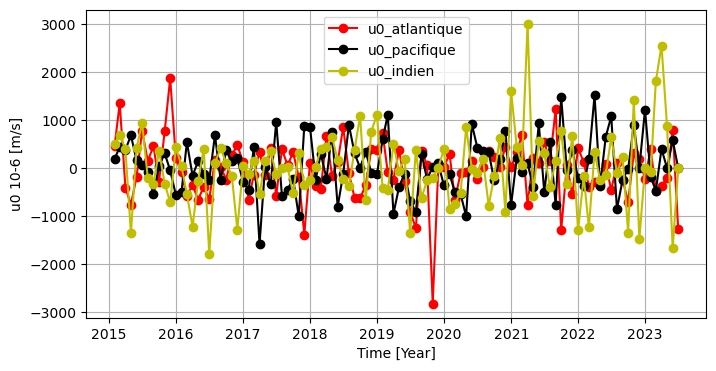

In [22]:
# Tracer le graphique
plt.figure(figsize=(8, 4))

plt.plot(mean_u0, color='r',marker='o', linestyle='-', label='u0_atlantique')
plt.plot(mean_u0_p, color='k', marker='o', linestyle='-', label='u0_pacifique')
plt.plot(mean_u0_i, color='y', marker='o', linestyle='-', label='u0_indien')

# plt.title('  ')
plt.xlabel('Time [Year]')
plt.ylabel('u0 10-6 [m/s]')
plt.grid(True)
plt.legend()

# Set font size and font weight directly on the Axes object
# ax = plt.gca()
# ax.tick_params(axis='both', which='major', labelsize=12, width=2)
# for label in ax.get_xticklabels():
#    label.set_fontweight('bold')

# Set x-axis limits and tick labels
# ax.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2023-06-01'))
# ax.set_xticks(pd.date_range(start='2015-01-01', end='2023-06-01', freq='504'))
# ax.set_xticklabels(pd.date_range(start='2015-01-01', end='2023-06-01', freq='504').strftime('%Y-%m-%d'), rotation=0)

plt.savefig("fig28 mode.png")
plt.show()

## Case of v0

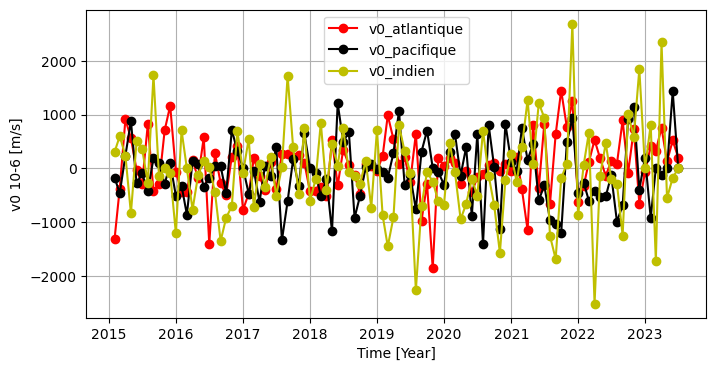

In [21]:
# Tracer le graphique
plt.figure(figsize=(8, 4))

plt.plot(mean_v0, color='r',marker='o', linestyle='-', label='v0_atlantique')
plt.plot(mean_v0_p, color='k', marker='o', linestyle='-', label='v0_pacifique')
plt.plot(mean_v0_i, color='y', marker='o', linestyle='-', label='v0_indien')

# plt.title('  ')
plt.xlabel('Time [Year]')
plt.ylabel('v0 10-6 [m/s]')
plt.grid(True)
plt.legend()

# Set font size and font weight directly on the Axes object
# ax = plt.gca()
# ax.tick_params(axis='both', which='major', labelsize=12, width=2)
# for label in ax.get_xticklabels():
#    label.set_fontweight('bold')

# Set x-axis limits and tick labels
# ax.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2023-06-01'))
# ax.set_xticks(pd.date_range(start='2015-01-01', end='2023-06-01', freq='504'))
# ax.set_xticklabels(pd.date_range(start='2015-01-01', end='2023-06-01', freq='504').strftime('%Y-%m-%d'), rotation=0)

plt.savefig("fig29 mode.png")
plt.show()